### 필요한 것들
- fbref 특정 포지션의 전체 기록 자체를 스크래핑하는 방법을 찾아야 더 빨리 시각화할 수 있음

In [99]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt
import pandas as pd

#한글 깨짐 방지 코드
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

In [108]:
df = pd.read_excel("C:/박규영/축구포트폴리오/이강인vs쿠보.xlsx")

In [109]:
result = df.pivot_table(index='name', columns='col', values='per90', aggfunc='sum')
result.reset_index(inplace=True)

In [110]:
col = ['Non-Penalty Goals', 'Non-Penalty xG', 'Shots Total', 'Assists', 'xAG',
       'npxG + xAG', 'Shot-Creating Actions', 'Passes Attempted', 'Progressive Passes', 
       'Progressive Carries', 'Successful Take-Ons', 'Touches (Att Pen)']

<div align="left">
  <p>원본 컬럼</p>
  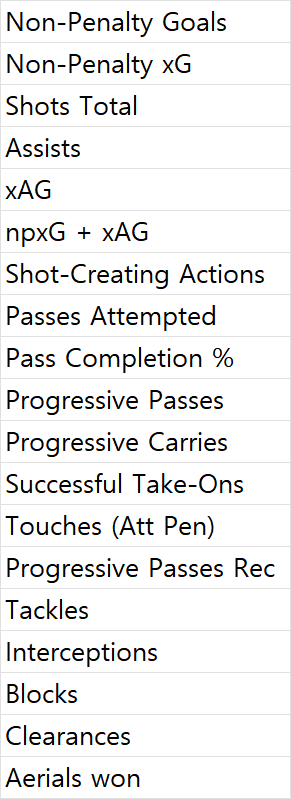
</div>

사용 파라미터: Non-Penalty Goals, Non-Penalty xG, Shots Total, Assists, xAGnpxG + xAG, Shot-Creating Actions, Passes Attempted, Progressive Passes, Progressive Carries, Successful Take-Ons, Touches (Att Pen)

In [111]:
# 필요한 선수 기록 리스트 반환

lee = result[result['name']=='Kang in Lee']
kubo = result[result['name']=='Kubo Take']

lee_array = lee[col].values
lee = [float(value) for value in lee_array[0]] # output_array[0]은 기존 출력의 첫리스트

kubo_array = kubo[col].values
kubo = [float(value) for value in kubo_array[0]]

print(lee)
print(kubo)

[0.19, 0.17, 1.5, 0.19, 0.17, 0.34, 3.77, 36.84, 3.26, 3.45, 2.87, 1.34]
[0.29, 0.2, 2.67, 0.19, 0.23, 0.43, 3.54, 33.09, 3.02, 4.21, 1.8, 4.82]


In [112]:
# fbref 사이트를 통해 해당 기록의 최고, 최소 기록 저장

high = [0.43,0.32,2.87,0.6,0.5,0.69,6.26,104.39,3.26,5.12,2.87,4.82]
low = [0,0,0.06,0,0.01,0.02,0.48,22.51,1.7,0.05,0.07,0]

lower_is_better = ['Miscontrol']

In [113]:
# 레이더 생성

radar = Radar(col, low, high,
              lower_is_better=lower_is_better,
              round_int=[False]*len(col),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              ring_width=1, center_circle_radius=1)

In [114]:
# 폰트설정

URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

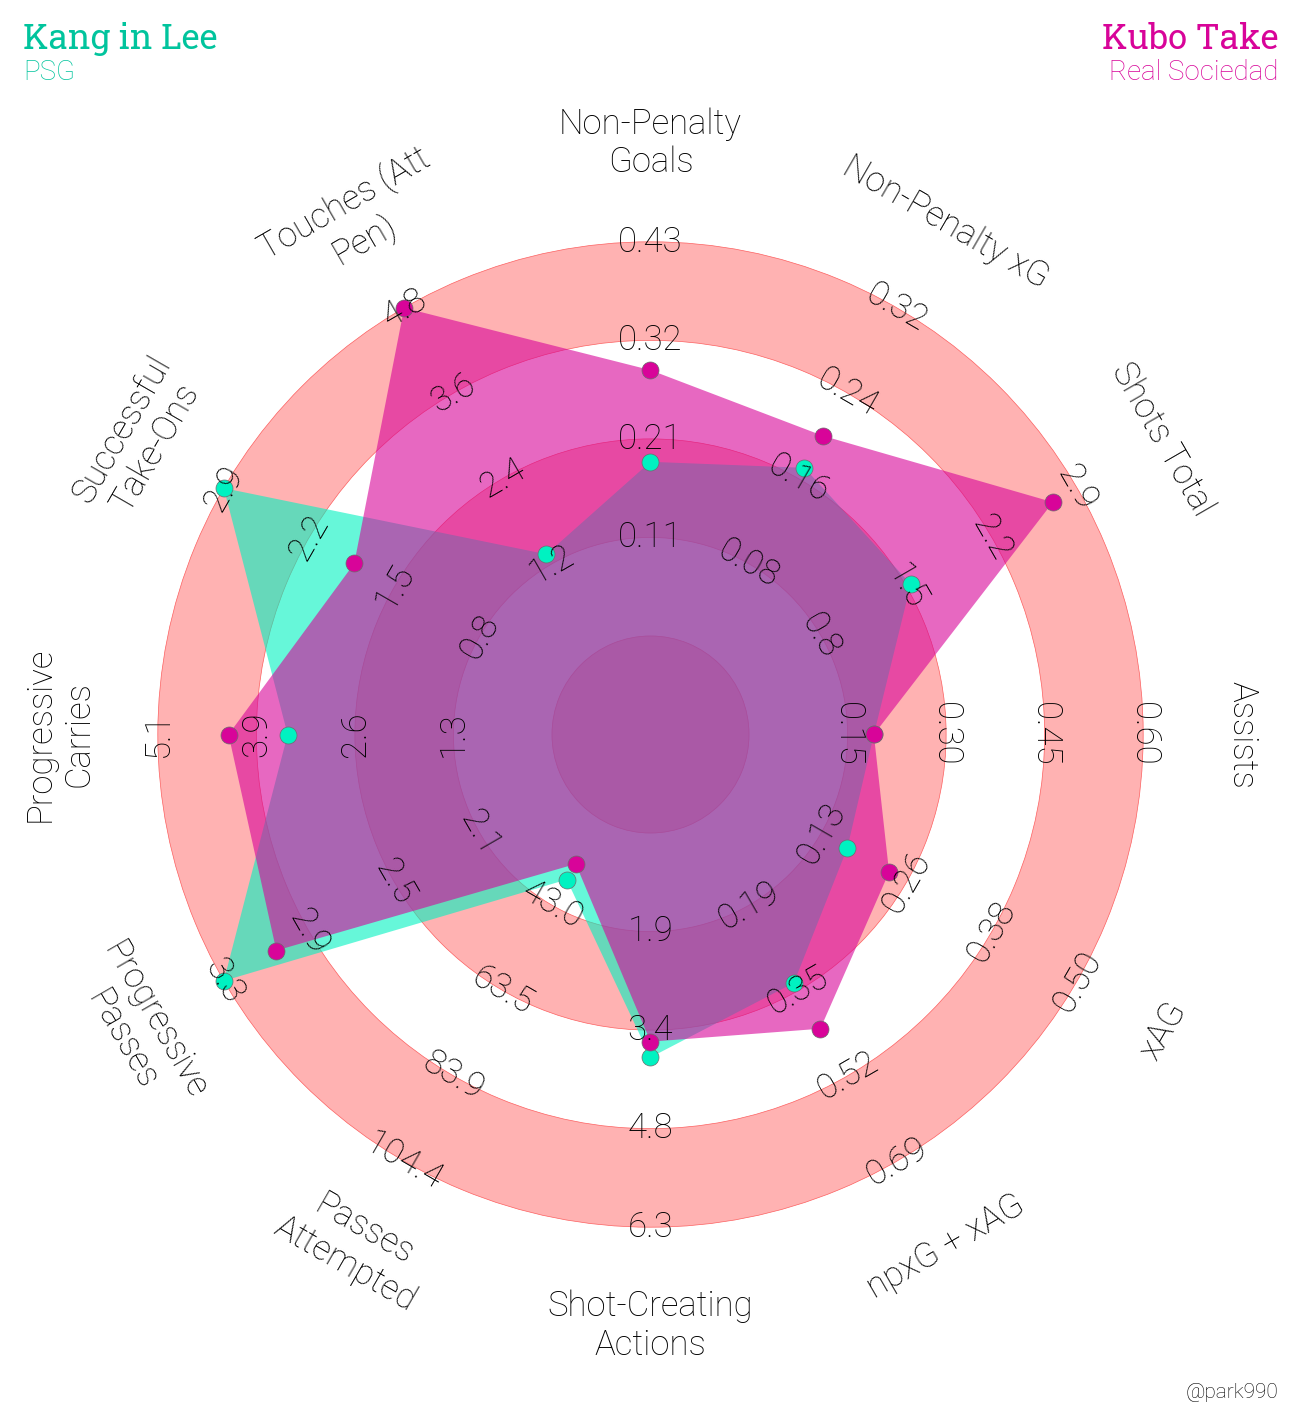

In [116]:
# creating the figure using the grid function from mplsoccer:

fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(lee, kubo, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})

radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)

endnote_text = axs['endnote'].text(0.99, 0.5, '@park990', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')

title1_text = axs['title'].text(0.01, 0.65, 'Kang in Lee', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')

title2_text = axs['title'].text(0.01, 0.25, 'PSG', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')

title3_text = axs['title'].text(0.99, 0.65, 'Kubo Take', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')

title4_text = axs['title'].text(0.99, 0.25, 'Real Sociedad', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')